## Convolutional Neural Network Assignment: Image Classification on CIFAR 10
###### Simon Seo (ms9144)
In this assignment, you will design and implement a CNN model in Keras. We will use the CIFAR-10. Please note you **only need to use 1000 training examples** (CPU is much slower than GPU so we do not use the full dataset). Please complete the rest of the notebook by doing following tasks.

- Build your network. Your network should have **at least 2 convolutional layers, 1 max pooling layer and 1 fully connected layer**
- Train your network. Use Keras to train your network based on your network structure. Describe your training procedure. Plot the following:
    1. Training and validation loss vs. training iterations.
    2. Training and validation accuracy vs. training iterations.
- Report a final test result on 100 testing examples.
- Give detailed explanation of your code


- *Bonus*: you can use more train/test data to build a stronger model

You may want to check [Keras documentation](http://keras.io) for reference.

In [2]:
# some setup code
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
import numpy as np

# A bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using Theano backend.
/Users/seo/anaconda3/envs/cnnPy3/lib/python3.4/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(y_train[:10])

X_train shape: (50000, 3, 32, 32)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].transpose((1,2,0)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [15]:
# Subsample the data for more efficient code execution in this exercise
num_training = 1000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# because Keras wants something called "one-hot" (https://en.wikipedia.org/wiki/One-hot) to be labels
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

1000 train samples
100 test samples


### Build and Train A CNN Model
This Neural Network consists of the following layers:
1. Convolutional layer
1. ReLU activation layer
1. Convolutional layer
1. ReLU activation layer
1. Max Pool layer
1. Dropout layer
1. Fully connected layer
1. ReLU activation layer
1. Dropout layer
1. Fully connected layer
1. ReLU activation layer
1. Dropout layer
1. Output layer

In [16]:
batch_size = 32 
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

model = Sequential()

### PLEASE PUT YOUR CODE HERE!
### Add Convolution, Activation and Pooling layers, compile your model, and fit it.

model.add(Convolution2D(32, 3, 3,
                        border_mode='same',
                        activation='relu',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Convolution2D(32, 3, 3,
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,
                activation='softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd,
#              loss='categorical_crossentropy')
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # range in [0,1]
X_test /= 255


hist = model.fit(X_train, y_train,
          batch_size=batch_size, 
          nb_epoch=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
          
score = model.evaluate(X_test, y_test,
                       show_accuracy=True)

print('Validation loss:', round(score[0],2))
print('Validation accuracy:', round(100*score[1],2), "%")

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 20s - loss: 2.3647 - val_loss: 2.2801
Epoch 2/10
1000/1000 [==============================] - 21s - loss: 2.2349 - val_loss: 2.1698
Epoch 3/10
1000/1000 [==============================] - 21s - loss: 2.1319 - val_loss: 2.1006
Epoch 4/10
1000/1000 [==============================] - 21s - loss: 2.0634 - val_loss: 2.3439
Epoch 5/10
1000/1000 [==============================] - 20s - loss: 1.9722 - val_loss: 1.9550
Epoch 6/10
1000/1000 [==============================] - 21s - loss: 1.8681 - val_loss: 1.8816
Epoch 7/10
1000/1000 [==============================] - 21s - loss: 1.7914 - val_loss: 1.8300
Epoch 8/10
1000/1000 [==============================] - 20s - loss: 1.6985 - val_loss: 2.1961
Epoch 9/10
1000/1000 [==============================] - 20s - loss: 1.6644 - val_loss: 1.7800
Epoch 10/10
100/100 [==============================] - 0s
Validation loss: 1.67
Validation accuracy: 40.0 %

### Test your model on test set

In [17]:
score = model.evaluate(X_test, y_test,
                       show_accuracy=True, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(hist.history)

100/100 [==============================] - 0s
Test loss: 1.67206430435
Test accuracy: 0.4
{'val_loss': [2.2800863265991209, 2.1697977066040037, 2.1006338453292845, 2.3438821601867676, 1.9549769401550292, 1.8815937995910645, 1.8300444507598876, 2.1961210536956788, 1.779995665550232, 1.6720643186569213], 'loss': [2.3646671600341795, 2.2349357566833494, 2.131936725616455, 2.0633879985809327, 1.9721885681152345, 1.868142713546753, 1.7913667507171631, 1.6984856815338134, 1.6643564720153809, 1.5229298105239868], 'batch': [15.128, 15.128, 15.128, 15.128, 15.128, 15.128, 15.128, 15.128, 15.128, 15.128], 'size': [31.808, 31.808, 31.808, 31.808, 31.808, 31.808, 31.808, 31.808, 31.808, 31.808]}


### Report on Training
This Neural Network takes around 20 seconds on each iteration, and it took 200 seconds in total to reach an accuracy around 40%. 

The training and validation loss is reported below.

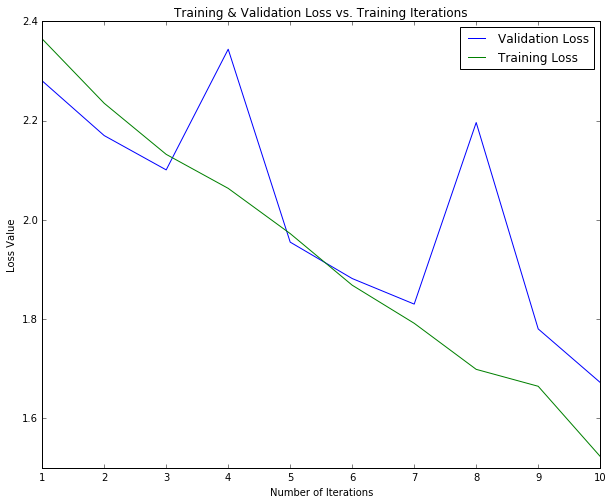

In [21]:
import matplotlib.pyplot as plt
iteration = list(range(1,11))
val_loss = hist.history['val_loss']
loss = hist.history['loss']
plt.plot(iteration, val_loss, label='Validation Loss')
plt.plot(iteration, loss, label='Training Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.title('Training & Validation Loss vs. Training Iterations')
plt.legend()
plt.show()